# Explore here
El ojetivo del análisis y por ende del modelo es predecir la disponibilidad de agua en los acuíferos en Italia. En este notebook en concreto, nos centraremos en la disponibilida de recuros en el acuífero de Auser.

Aquifer_Auser	"Information about the Auser aquifer. This water body consists of two subsystems, that we call NORH and SOUTH, where the former partly influences the behaviour of the latter.

The levels of the NORTH sector are represented by the values of the SAL, PAG, CoS and DIEC wells, while the levels of the SOUTH sector by the LT2 well."	

Depth_to_Groundwater_SAL, Depth_to_Groundwater_COS, Depth_to_Groundwater_LT2


Import libraries

In [1]:
#  Import some data manipulation and plotting packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

0. Data Ingestion

In [2]:
import pandas as pd
file = "/workspace/Time-Series-Acea-Smart-Water-Analytics-/data/raw/Aquifer_Auser.csv"
total_data = pd.read_csv(file)

1. Analisis descriptivo de datos

In [2]:
total_data.head()
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     8154 non-null   object 
 1   Rainfall_Gallicano                       5295 non-null   float64
 2   Rainfall_Pontetetto                      5295 non-null   float64
 3   Rainfall_Monte_Serra                     5289 non-null   float64
 4   Rainfall_Orentano                        5295 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 6   Rainfall_Piaggione                       4930 non-null   float64
 7   Rainfall_Calavorno                       5295 non-null   float64
 8   Rainfall_Croce_Arcana                    5295 non-null   float64
 9   Rainfall_Tereglio_Coreglia_Antelminelli  5295 non-null   float64
 10  Rainfall_Fabbriche_di_Vallico            5295 no

In [8]:
#Missing values
total_data.isnull().sum()*100/len(total_data)

Date                                        0.000000
Rainfall_Gallicano                         35.062546
Rainfall_Pontetetto                        35.062546
Rainfall_Monte_Serra                       35.136130
Rainfall_Orentano                          35.062546
Rainfall_Borgo_a_Mozzano                   35.062546
Rainfall_Piaggione                         39.538877
Rainfall_Calavorno                         35.062546
Rainfall_Croce_Arcana                      35.062546
Rainfall_Tereglio_Coreglia_Antelminelli    35.062546
Rainfall_Fabbriche_di_Vallico              35.062546
Depth_to_Groundwater_LT2                   41.108658
Depth_to_Groundwater_SAL                   44.260486
Depth_to_Groundwater_PAG                   53.311258
Depth_to_Groundwater_CoS                   47.081187
Depth_to_Groundwater_DIEC                  59.896983
Temperature_Orentano                        0.000000
Temperature_Monte_Serra                     0.000000
Temperature_Ponte_a_Moriano                 0.

In [10]:
#Nan values
total_data.isnull().sum()

Date                                          0
Rainfall_Gallicano                         2859
Rainfall_Pontetetto                        2859
Rainfall_Monte_Serra                       2865
Rainfall_Orentano                          2859
Rainfall_Borgo_a_Mozzano                   2859
Rainfall_Piaggione                         3224
Rainfall_Calavorno                         2859
Rainfall_Croce_Arcana                      2859
Rainfall_Tereglio_Coreglia_Antelminelli    2859
Rainfall_Fabbriche_di_Vallico              2859
Depth_to_Groundwater_LT2                   3352
Depth_to_Groundwater_SAL                   3609
Depth_to_Groundwater_PAG                   4347
Depth_to_Groundwater_CoS                   3839
Depth_to_Groundwater_DIEC                  4884
Temperature_Orentano                          0
Temperature_Monte_Serra                       0
Temperature_Ponte_a_Moriano                   0
Temperature_Lucca_Orto_Botanico               0
Volume_POL                              

Combinatoria de variables

In [11]:
# Supongamos que tienes un DataFrame llamado 'total_data' con las columnas originales
# Nombre de las columnas originales
column_names = total_data.columns

# Crear una nueva columna "Rainfall" que contenga la suma de las columnas de precipitación
rainfall_columns = ['Rainfall_Gallicano', 'Rainfall_Pontetetto', 'Rainfall_Monte_Serra',
                    'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano', 'Rainfall_Piaggione',
                    'Rainfall_Calavorno', 'Rainfall_Croce_Arcana', 'Rainfall_Tereglio_Coreglia_Antelminelli',
                    'Rainfall_Fabbriche_di_Vallico']
total_data['Rainfall'] = total_data[rainfall_columns].sum(axis=1)

# Crear una nueva columna "Depth_to_Groundwater" que contenga la suma de las columnas de profundidad de agua
depth_columns = ['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
                 'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC']
total_data['Depth_to_Groundwater'] = total_data[depth_columns].sum(axis=1)

# Crear una nueva columna "Temperature" que contenga la suma de las columnas de temperatura
temperature_columns = ['Temperature_Orentano', 'Temperature_Monte_Serra', 'Temperature_Ponte_a_Moriano',
                       'Temperature_Lucca_Orto_Botanico']
total_data['Temperature'] = total_data[temperature_columns].sum(axis=1)

# Crear una nueva columna "Volume" que contenga la suma de las columnas de volumen
volume_columns = ['Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL']
total_data['Volume'] = total_data[volume_columns].sum(axis=1)

# Crear una nueva columna "Hydrometry" que contenga la suma de las columnas de hidrometría
hydrometry_columns = ['Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione']
total_data['Hydrometry'] = total_data[hydrometry_columns].sum(axis=1)

# Eliminar las columnas originales de precipitación, profundidad de agua, temperatura, volumen e hidrometría
columns_to_drop = (rainfall_columns + depth_columns + temperature_columns + volume_columns + hydrometry_columns)
total_data.drop(columns=columns_to_drop, inplace=True)

# Mostrar las primeras filas del DataFrame con las columnas consolidadas
total_data.head()


,Date,Rainfall,Depth_to_Groundwater,Temperature,Volume,Hydrometry
0,05/03/1998,0.0,0.0,0.00,0.0,0.0
1,06/03/1998,0.0,0.0,10.05,0.0,0.0
2,07/03/1998,0.0,0.0,19.20,0.0,0.0
3,08/03/1998,0.0,0.0,25.25,0.0,0.0
4,09/03/1998,0.0,0.0,24.25,0.0,0.0


Parsing de fechas

In [14]:

total_data['Date'] = pd.to_datetime(total_data['Date'], format='%d/%m/%Y')

# Now the 'date' column is parsed correctly as datetime objects


In [18]:
total_data.isnull().sum()
total_data.isnull().sum()*100/len(total_data)

Date                    0.0
Rainfall                0.0
Depth_to_Groundwater    0.0
Temperature             0.0
Volume                  0.0
Hydrometry              0.0
dtype: float64

1. Data Visualization

📊Data visualization

⛲Depth_to_Groundwater 👉 Target

⛲Rainfall 👉 It indicates the quantity of rain falling, expressed in millimeters (mm), in the area

⛲Temperature 👉 It indicates the temperature, expressed in °C, detected by the thermometric station

⛲Volume 👉  It indicates the volume of water, expressed in cubic meters (mc), taken from the drinking water treatment plant

⛲Hydrometry 👉 It indicates the groundwater level, expressed in meters (m), detected by the hydrometric station


In [25]:
# Muestra todos los datos de la columna 'Temperature' en el DataFrame 'total_data'
print(total_data['Temperature'])


0        0.00
1       10.05
2       19.20
3       25.25
4       24.25
        ...  
8149    67.70
8150    69.25
8151    70.30
8152    64.90
8153    68.90
Name: Temperature, Length: 8154, dtype: float64


Cambio de farenheit a celsius

In [26]:
total_data['Temperature'] = total_data['Temperature'].apply(lambda fahrenheit: (fahrenheit - 32) * 5/9)


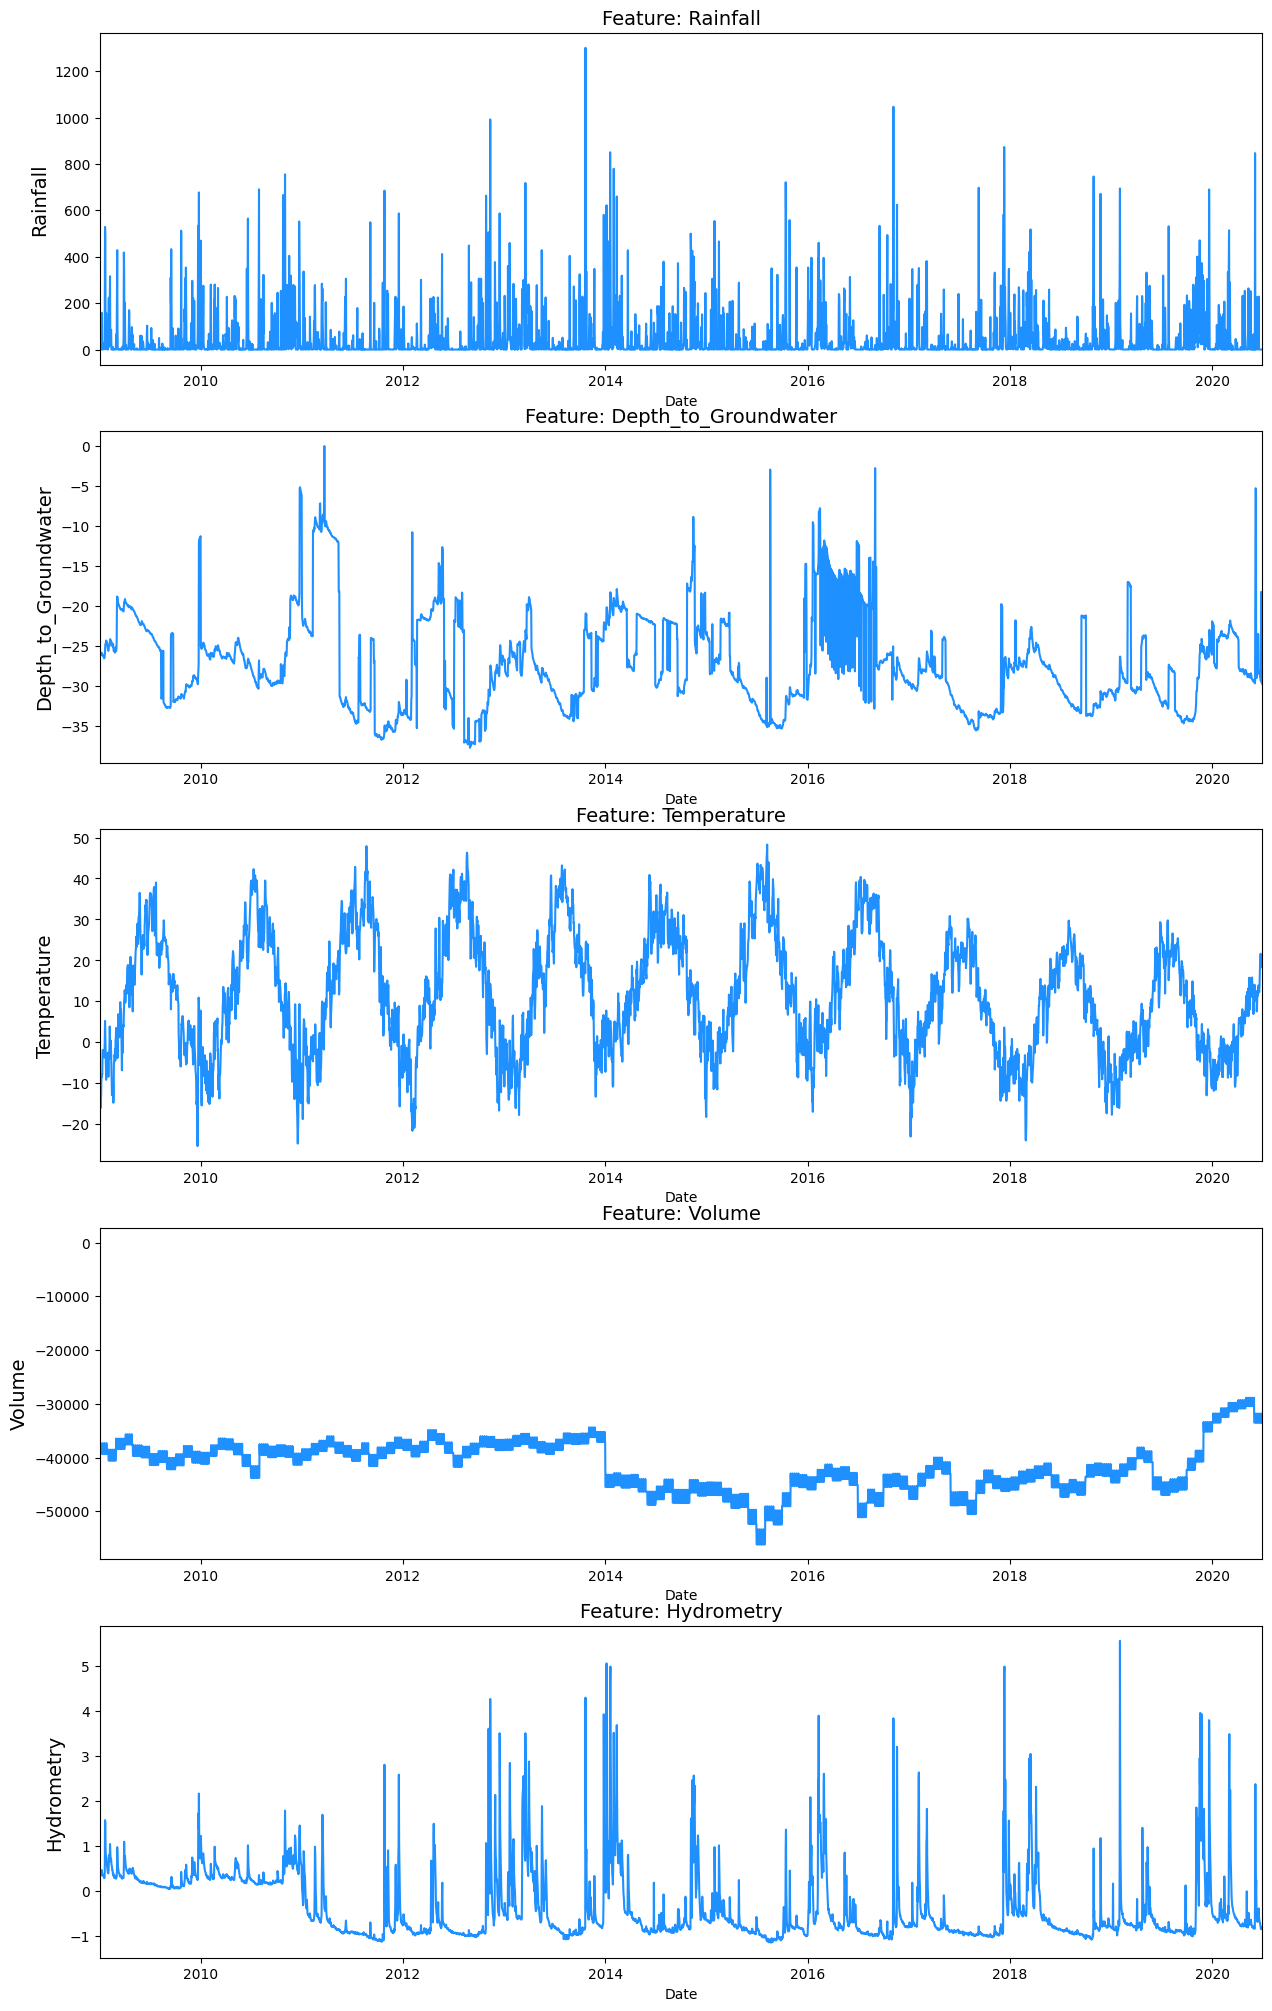

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

# Crear subplots
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

# Iterar a través de las columnas de total_data
for i, column in enumerate(total_data.drop('Date', axis=1).columns):
    sns.lineplot(x=total_data['Date'], y=total_data[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

# Mostrar los gráficos
plt.show()


2. Data preprocessing

In [29]:
total_data = total_data.sort_values(by='Date')

# Check time intervals
total_data['delta'] = total_data['Date'] - total_data['Date'].shift(1)

total_data[['Date', 'delta']].head()

,Date,delta
0,1998-03-05,NaT
1,1998-03-06,1 days
2,1998-03-07,1 days
3,1998-03-08,1 days
4,1998-03-09,1 days


In [30]:
total_data['delta'].sum(), total_data['delta'].count()

(Timedelta('8153 days 00:00:00'), 8153)

In [32]:
total_data = total_data.drop('delta', axis=1)
total_data.isna().sum()

Date                    0
Rainfall                0
Depth_to_Groundwater    0
Temperature             0
Volume                  0
Hydrometry              0
dtype: int64

No es necesario, ya que no hay valores faltantes

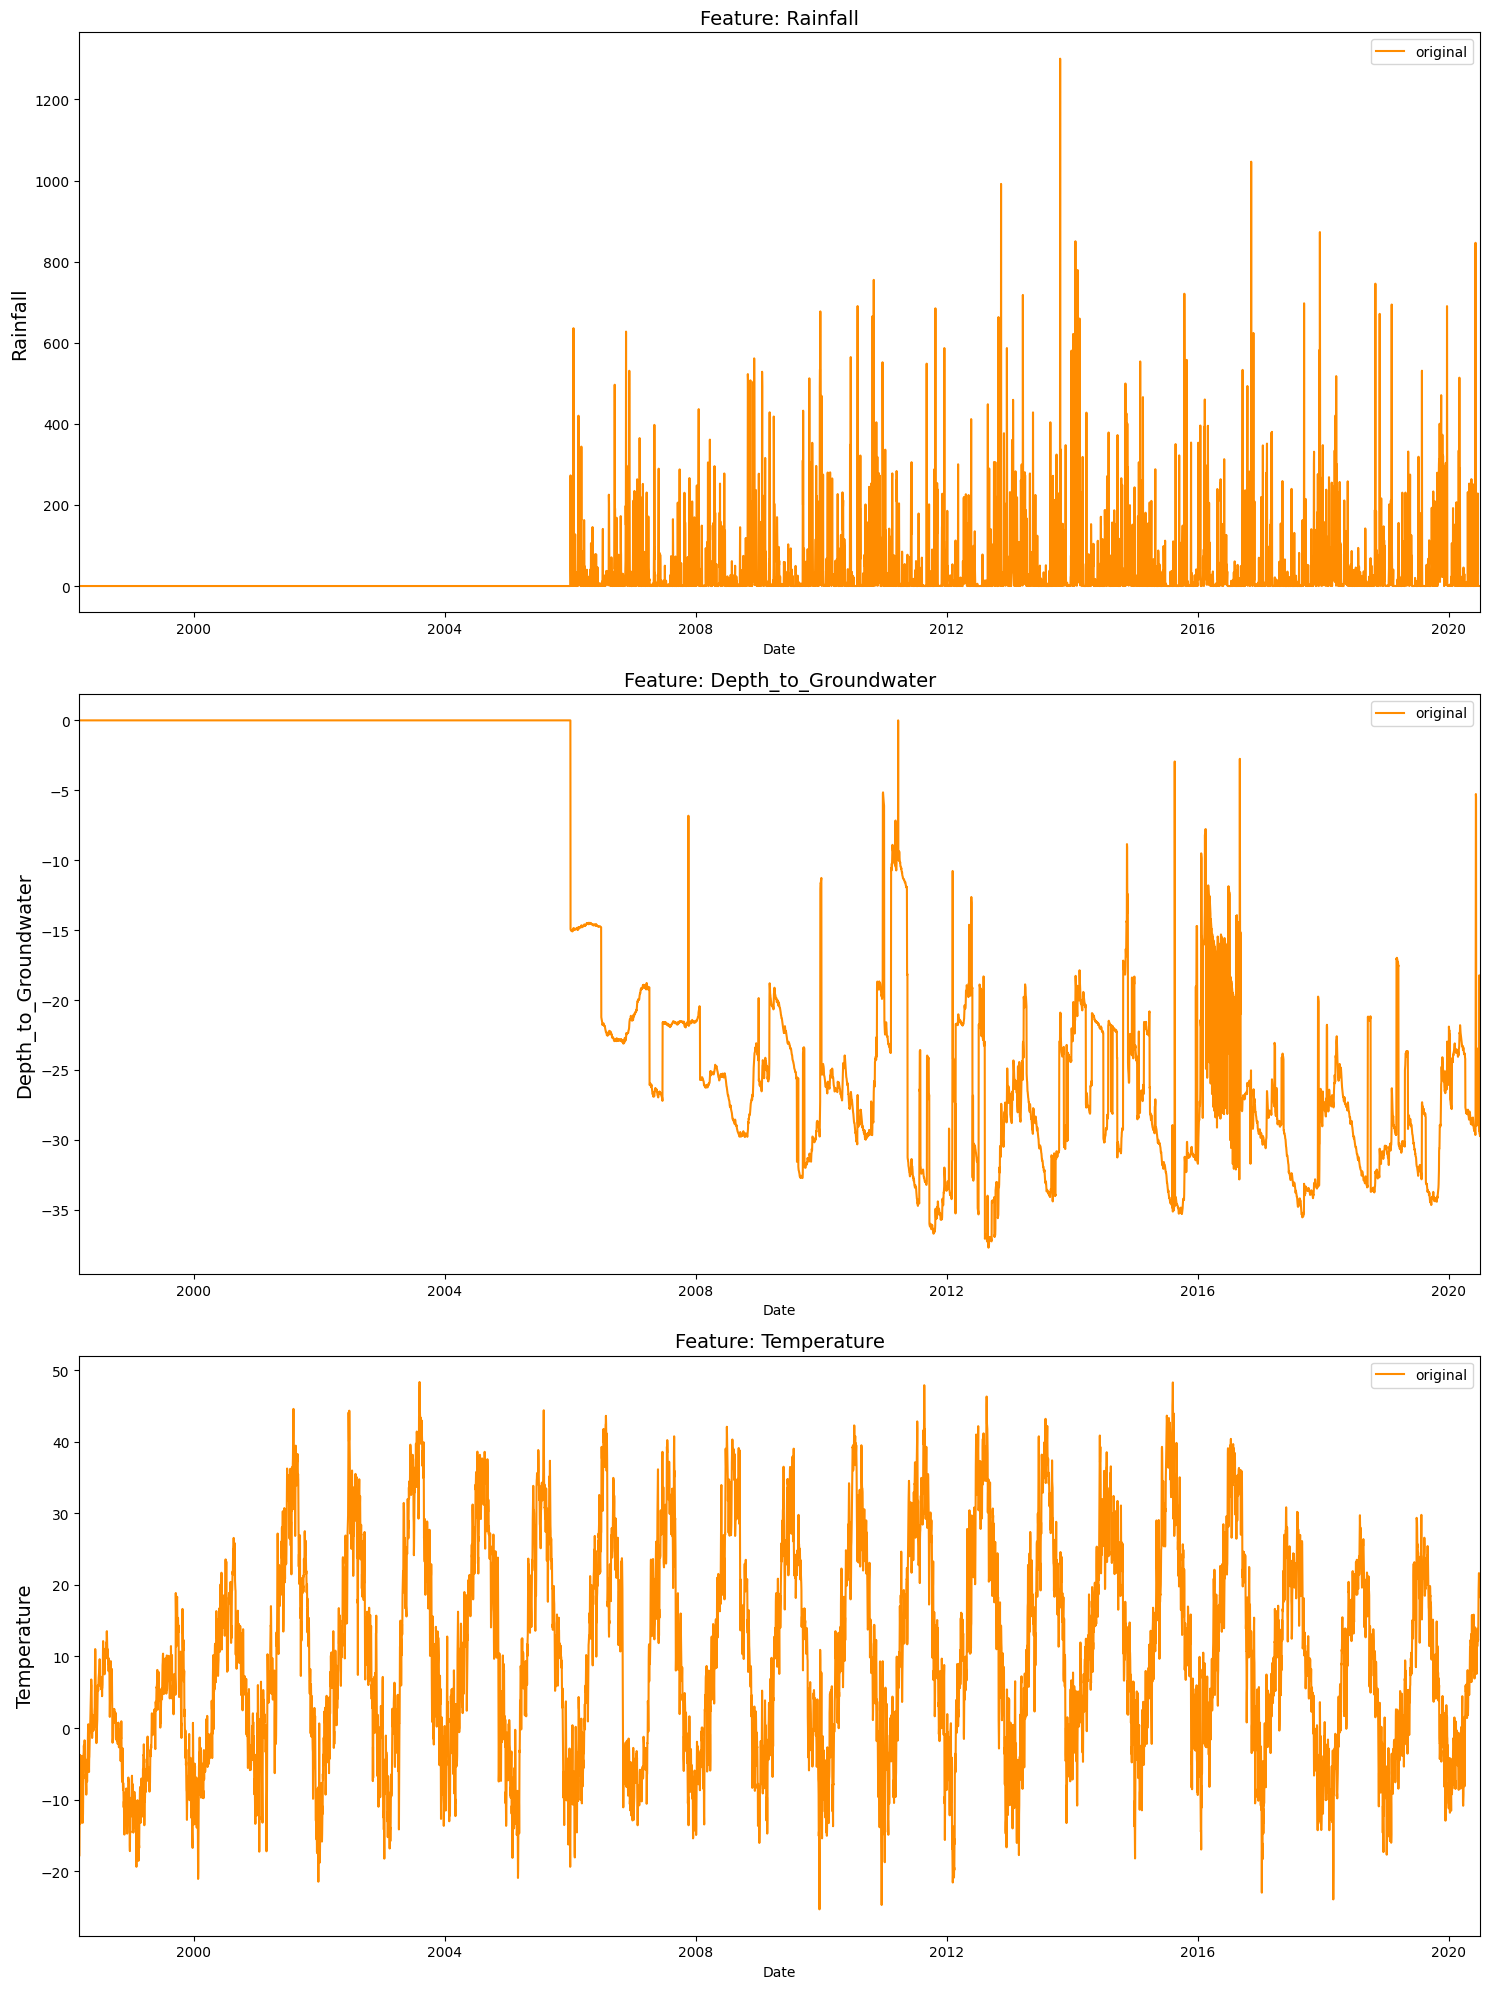

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))

# Gráfico para 'Rainfall'
sns.lineplot(x=total_data['Date'], y=total_data['Rainfall'], ax=ax[0], color='darkorange', label='original')
ax[0].set_title('Feature: Rainfall', fontsize=14)
ax[0].set_ylabel(ylabel='Rainfall', fontsize=14)

# Gráfico para 'Depth_to_Groundwater'
sns.lineplot(x=total_data['Date'], y=total_data['Depth_to_Groundwater'], ax=ax[1], color='darkorange', label='original')
ax[1].set_title('Feature: Depth_to_Groundwater', fontsize=14)
ax[1].set_ylabel(ylabel='Depth_to_Groundwater', fontsize=14)

# Gráfico para 'Temperature'
sns.lineplot(x=total_data['Date'], y=total_data['Temperature'], ax=ax[2], color='darkorange', label='original')
ax[2].set_title('Feature: Temperature', fontsize=14)
ax[2].set_ylabel(ylabel='Temperature', fontsize=14)

# Ajustar los límites de fecha
for i in range(3):
    ax[i].set_xlim([total_data['Date'].min(), total_data['Date'].max()])

# Mostrar los gráficos
plt.tight_layout()
plt.show()


Resampling if apply

Upsampling is when the frequency of samples is increased (e.g. days to hours)

Downsampling is when the frequency of samples is decreased (e.g. days to weeks)

In [40]:
# Asegúrate de que 'Date' sea el índice y está en formato de fecha y hora
total_data['Date'] = pd.to_datetime(total_data['Date'])
total_data.set_index('Date', inplace=True)

# Realiza el resampling semanal y calcula la media de las variables seleccionadas
downsample = total_data[['Depth_to_Groundwater', 'Temperature', 'Volume', 'Hydrometry', 'Rainfall']].resample('7D').mean()

# Reinicia el índice
downsample.reset_index(drop=False, inplace=True)

# Ahora, downsample contiene los datos muestreados de forma semanal
total_data = downsample.copy()


Stationary

In [ ]:
#Check stationary

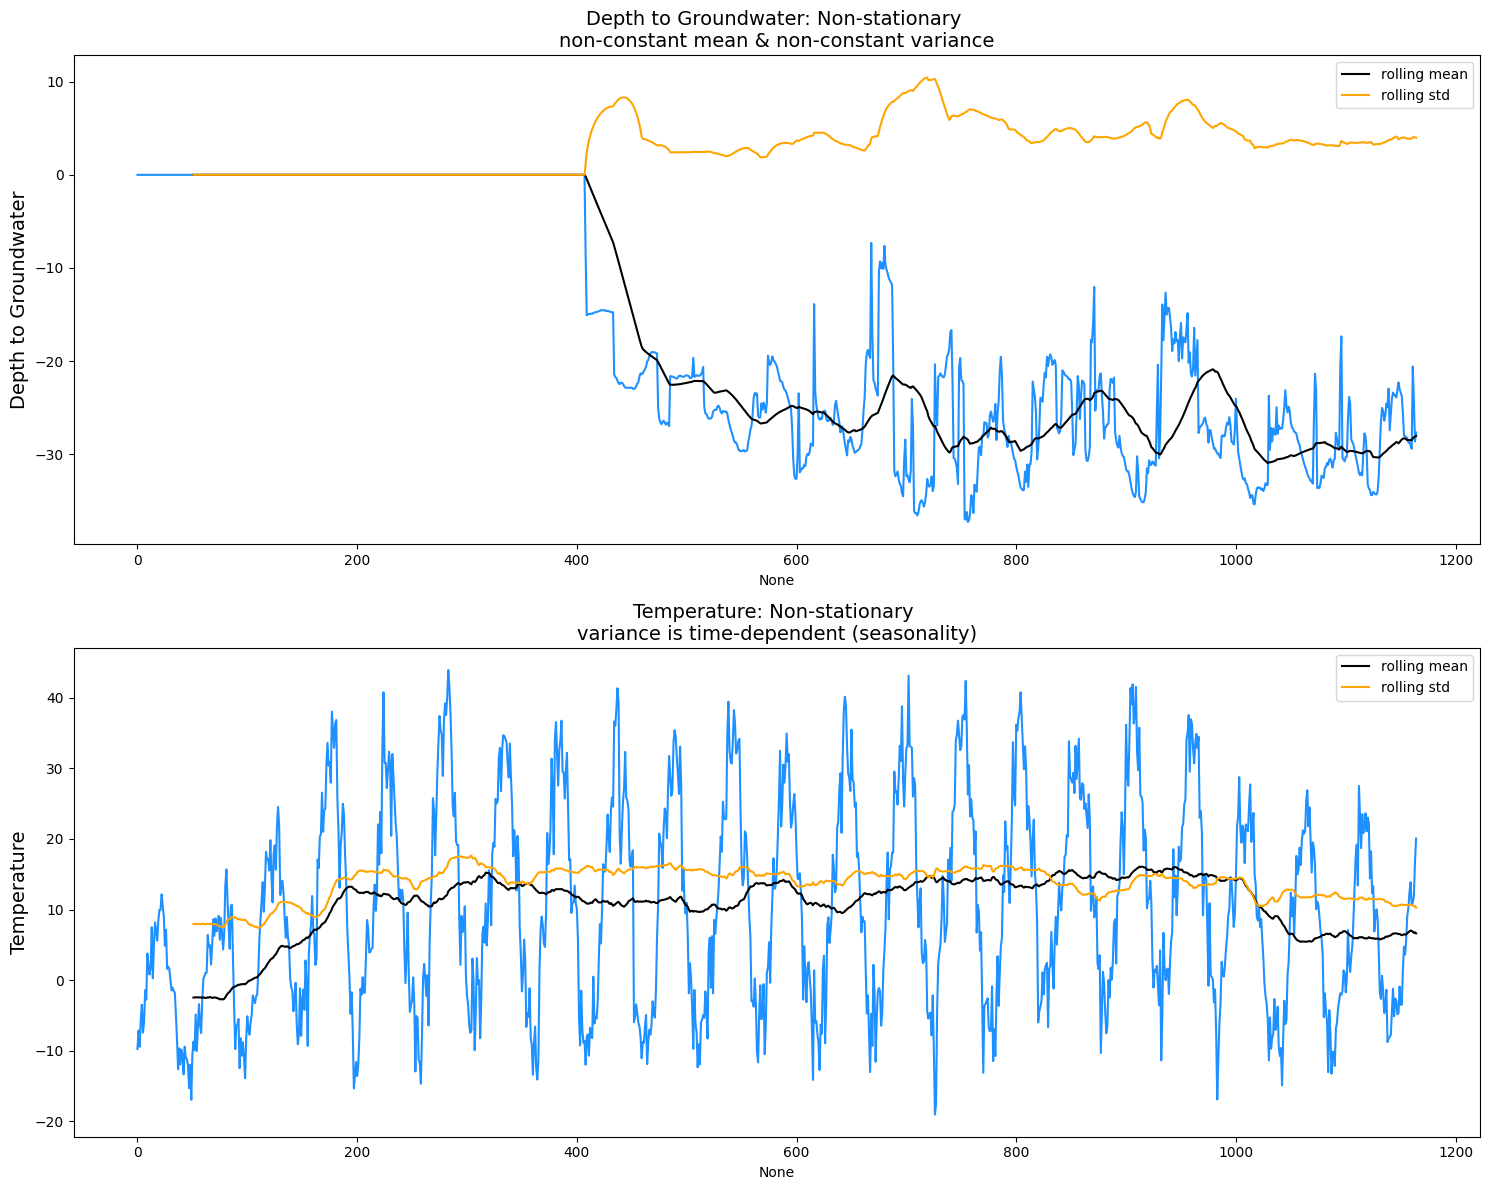

In [41]:
rolling_window = 52

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Gráfico para 'Depth_to_Groundwater'
sns.lineplot(x=total_data.index, y=total_data['Depth_to_Groundwater'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=total_data.index, y=total_data['Depth_to_Groundwater'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=total_data.index, y=total_data['Depth_to_Groundwater'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
ax[0].set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0].set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

# Gráfico para 'Temperature'
sns.lineplot(x=total_data.index, y=total_data['Temperature'], ax=ax[1], color='dodgerblue')
sns.lineplot(x=total_data.index, y=total_data['Temperature'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=total_data.index, y=total_data['Temperature'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
ax[1].set_title('Temperature: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)

plt.tight_layout()
plt.show()


Gráfico Superior - Profundidad del Agua Subterránea:

Exhibe fluctuaciones en la profundidad del agua subterránea a lo largo del tiempo, con valores negativos indicando mediciones debajo de un punto de referencia en la superficie.
La media móvil (línea negra) muestra una tendencia cambiante, sin un patrón estacional evidente.
La desviación estándar móvil (línea naranja) revela una variabilidad significativa en las mediciones.
Los datos son no estacionarios, lo que significa que la media y la varianza no son constantes y pueden estar influenciadas por diversos factores ambientales o humanos.

Gráfico Inferior - Temperatura:

Muestra un claro patrón estacional en las temperaturas con picos y valles regulares.
La media móvil (línea negra) suaviza las fluctuaciones y destaca la tendencia subyacente.
La desviación estándar móvil (línea naranja) indica variabilidad en la temperatura, con una posible dependencia estacional.
Los datos de temperatura son no estacionarios en el sentido de que la media y la varianza cambian a lo largo del año, siguiendo un patrón estacional.
Conclusión:

El patrón estacional es claro en la temperatura pero no en la profundidad del agua subterránea según la visualización proporcionada.

Dickey Fuller Testing

In [45]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(total_data['Depth_to_Groundwater'].values)
result

(-1.9712787554892122,
 0.29930657940316713,
 7,
 1157,
 {'1%': -3.436014535478888,
  '5%': -2.8640412872730208,
  '10%': -2.56810174401953},
 4825.923034735783)

In [47]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1165 non-null   datetime64[ns]
 1   Depth_to_Groundwater  1165 non-null   float64       
 2   Temperature           1165 non-null   float64       
 3   Volume                1165 non-null   float64       
 4   Hydrometry            1165 non-null   float64       
 5   Rainfall              1165 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 54.7 KB


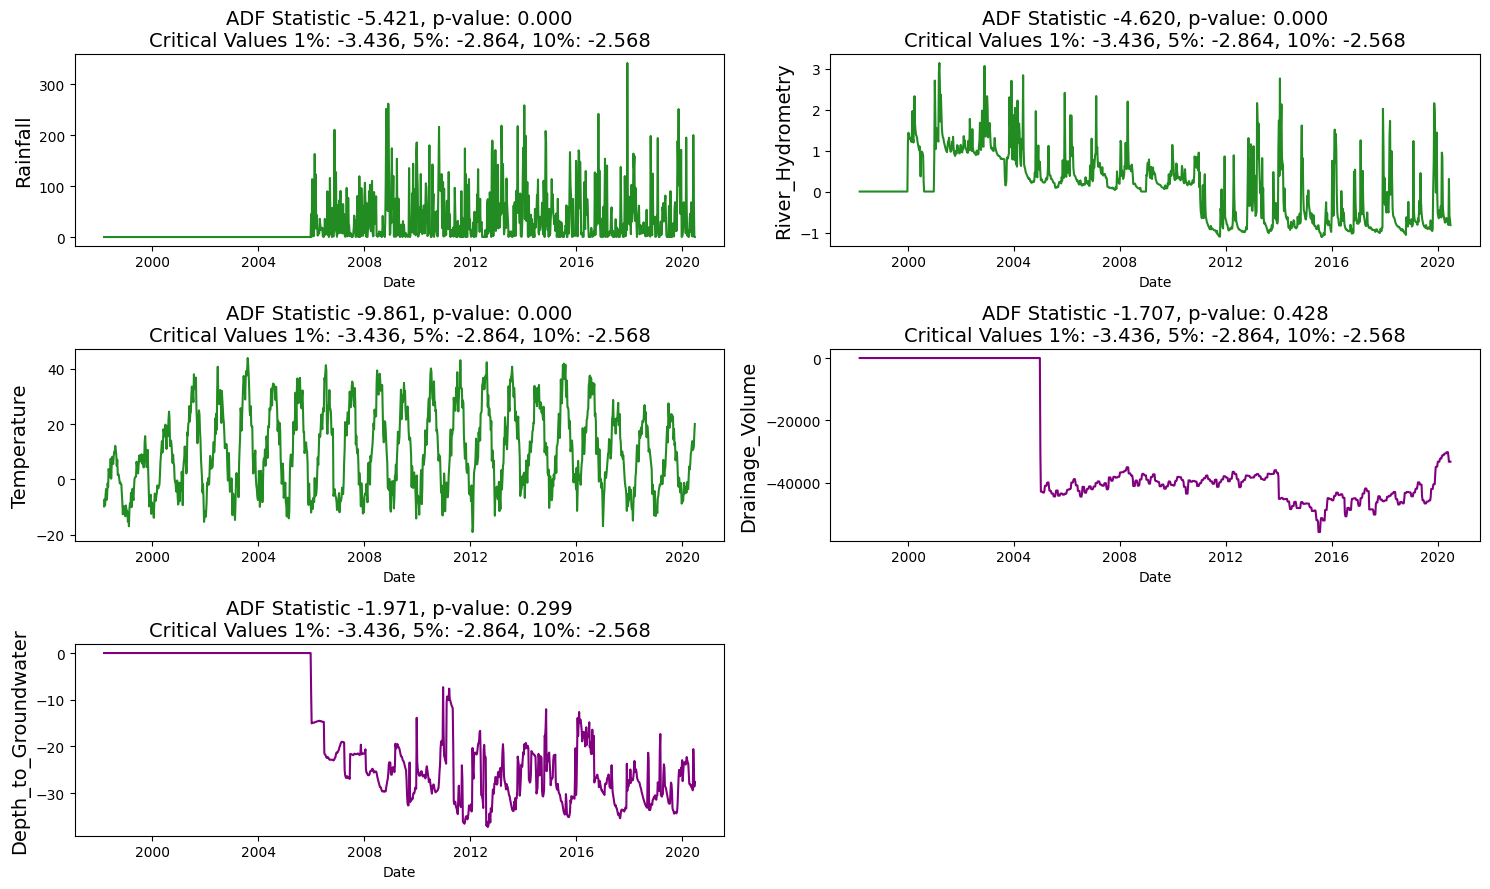

In [48]:
from statsmodels.tsa.stattools import adfuller

f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=total_data['Date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(total_data['Rainfall'].values, 'Rainfall', ax[0, 0])
visualize_adfuller_results(total_data['Temperature'].values, 'Temperature', ax[1, 0])
visualize_adfuller_results(total_data['Hydrometry'].values, 'River_Hydrometry', ax[0, 1])
visualize_adfuller_results(total_data['Volume'].values, 'Drainage_Volume', ax[1, 1])
visualize_adfuller_results(total_data['Depth_to_Groundwater'].values, 'Depth_to_Groundwater', ax[2, 0])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()



Interpretación de los gráficos

Rainfall (Precipitaciones): El estadístico ADF es -5.421 y el valor p es 0.000, lo que indica que la serie temporal es estacionaria ya que el valor p es menor que 0.05 y el estadístico ADF es menor que los valores críticos.

Temperature (Temperatura): El estadístico ADF es -9.861 y el valor p es 0.000, similar a la lluvia, lo que indica que la serie temporal es estacionaria.

River_Hydrometry (Hidrometría de Río): El estadístico ADF es -4.620 y el valor p es 0.000, indicando estacionariedad.

Drainage_Volume (Volumen de Drenaje): El estadístico ADF es -1.707 y el valor p es 0.428, lo que indica que la serie temporal no es estacionaria ya que el valor p es mayor que 0.05 y el estadístico ADF es mayor que los valores críticos.

Depth_to_Groundwater (Profundidad del Agua Subterránea): El estadístico ADF es -1.971 y el valor p es 0.299, lo que también indica no estacionariedad por las mismas razones que el volumen de drenaje.

Aplicar transformación:

No hay indicaciones directas de la necesidad de transformaciones en las series de precipitaciones, temperatura y hidrometría de río, ya que estas series ya parecen estacionarias. Las transformaciones son a menudo aplicadas para estabilizar la varianza, por lo que si hubiera evidencia de varianza no constante en los datos estacionarios, entonces podrías considerar aplicar una transformación.

Aplicar diferenciación:

Volumen de Drenaje (Drainage Volume): Dado que la serie temporal no es estacionaria, se recomienda aplicar diferenciación para alcanzar la estacionariedad.

Profundidad del Agua Subterránea (Depth to Groundwater): Esta serie también es no estacionaria, por lo que debería ser diferenciada para hacerla estacionaria.

Por tanto, las series de Volumen de Drenaje y Profundidad del Agua Subterránea requieren diferenciación. Las demás series, al ser estacionarias según la prueba ADF, no necesitarían diferenciación, aunque la necesidad de transformación dependerá de la constancia de la varianza que no se puede determinar solo con la prueba ADF.

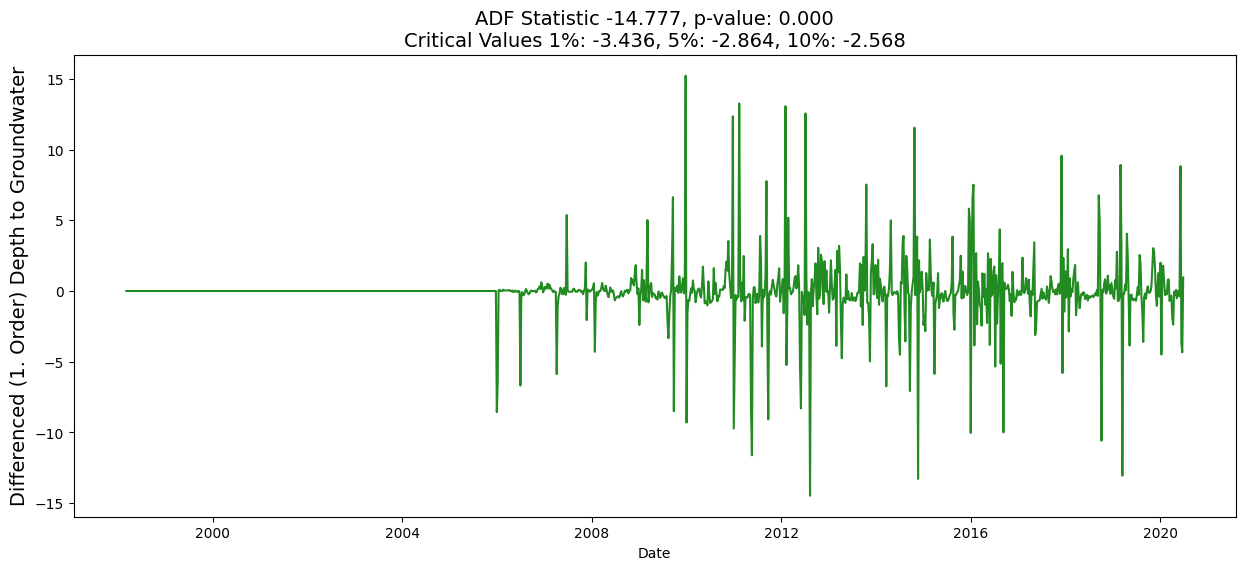

In [49]:
# First Order Differencing for 'Depth_to_Groundwater'
ts_diff_depth = np.diff(total_data['Depth_to_Groundwater'])
total_data['Depth_to_Groundwater_diff_1'] = np.append([0], ts_diff_depth)

# First Order Differencing for 'Drainage Volume'
ts_diff_drainage = np.diff(total_data['Volume'])
total_data['Drainage_Volume_diff_1'] = np.append([0], ts_diff_drainage)

# Visualización de 'Depth_to_Groundwater' después de la diferenciación
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(total_data['Depth_to_Groundwater_diff_1'], 'Differenced (1. Order) Depth to Groundwater', ax)


Feature engineering

In [52]:
import pandas as pd

# Agregar características de fecha
total_data['year'] = pd.DatetimeIndex(total_data['Date']).year
total_data['month'] = pd.DatetimeIndex(total_data['Date']).month
total_data['day'] = pd.DatetimeIndex(total_data['Date']).day
total_data['day_of_year'] = pd.DatetimeIndex(total_data['Date']).dayofyear
total_data['week_of_year'] = pd.DatetimeIndex(total_data['Date']).strftime('%U').astype(int)
total_data['quarter'] = pd.DatetimeIndex(total_data['Date']).quarter
total_data['season'] = total_data['month'] % 12 // 3 + 1

# Visualizar las nuevas características
total_data[['Date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()



,Date,year,month,day,day_of_year,week_of_year,quarter,season
0,1998-03-05,1998,3,5,64,9,1,2
1,1998-03-12,1998,3,12,71,10,1,2
2,1998-03-19,1998,3,19,78,11,1,2
3,1998-03-26,1998,3,26,85,12,1,2
4,1998-04-02,1998,4,2,92,13,2,2


Cyclical representation

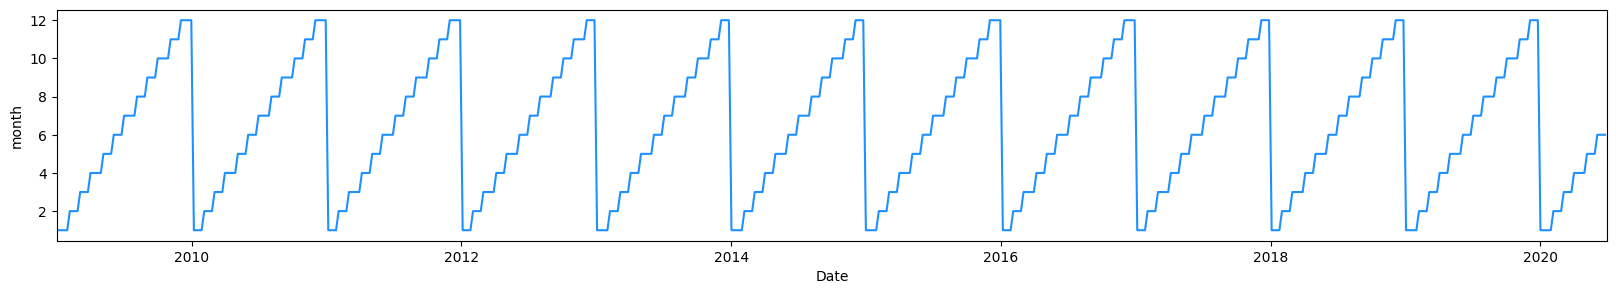

In [54]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=total_data['Date'], y=total_data['month'], color='dodgerblue')
ax.set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()